# Logistic Regression

Method for classification (where we have "categories").

The convention is to have two classes: "0" and "1".

Logistic regression always outputs the probability from 0 to 1 of belonging in the "1" class. 

Using 0.5 as a cutoff, anything below it results in class "0", anything above it is class "1".

## Model evaluation

Using confusion matrix.

* True Positives.
* True Negatives.
* False Positives (Type 1).
* False Negatives (Type 2).

### Accuracy

(TP + TN) / Total = 150/165 = 0.91

### Misclassification Rate (Error rate)
(FP + FN) / Total = 15/165 = 0.09

## Ligistic Regression with Python
### Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/14-titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

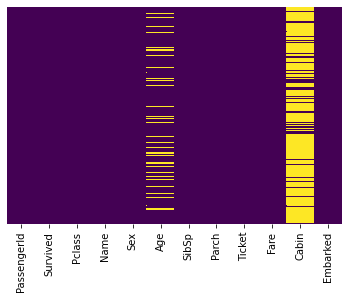

In [3]:
# Heatmap for missing data: yellow is missing data points
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

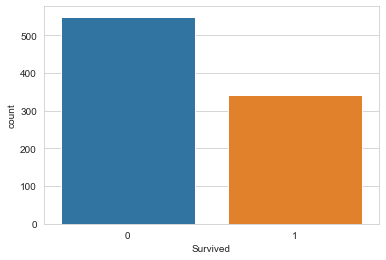

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

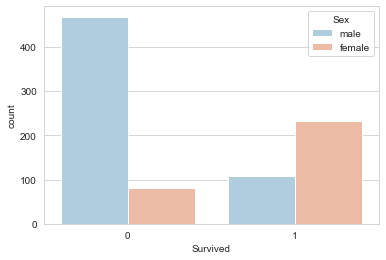

In [5]:
# Survival by gender
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

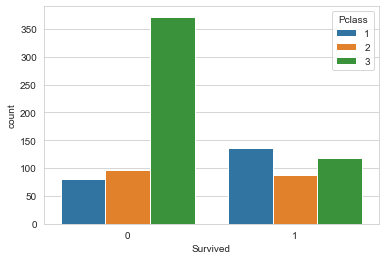

In [6]:
# Survival by passanger class: 3rd class has more deceases...
sns.countplot(x='Survived', data=train, hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

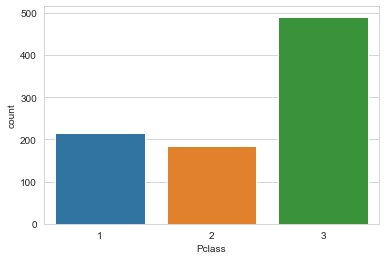

In [7]:
# Survival by passanger class: ... but also has more passangers 
sns.countplot(x='Pclass', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survival Rate'>

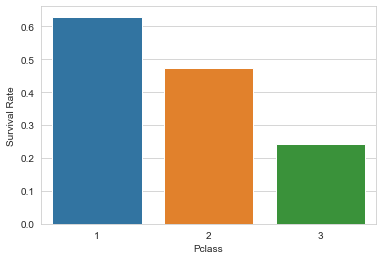

In [8]:
# # Survival by passanger class: 1st class has higher survival rate
grp = train.groupby('Pclass')
grp_df = pd.DataFrame(grp.count()['PassengerId']).rename(columns={'PassengerId': 'Total'})
grp_df['Survived'] = grp.sum()['Survived']
grp_df['Survival Rate'] =  grp_df['Survived']/grp_df['Total']
sns.barplot(x='Pclass', y='Survival Rate', data=grp_df.reset_index())

<AxesSubplot:xlabel='Pclass', ylabel='count'>

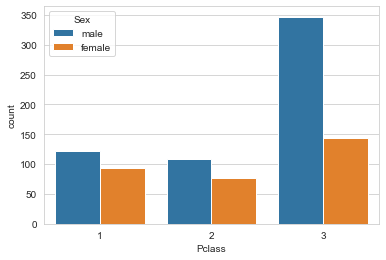

In [9]:
# Gender by class: more male in 3rd class
sns.countplot(x ='Pclass', data= train, hue='Sex')

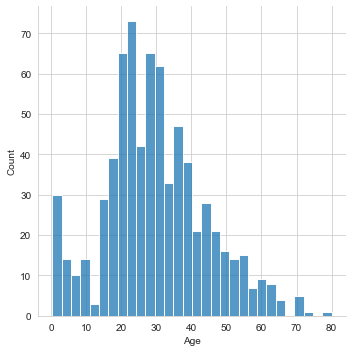

In [10]:
# Age distribution: Average 29 / 30
sns.displot(train['Age'].dropna(), bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

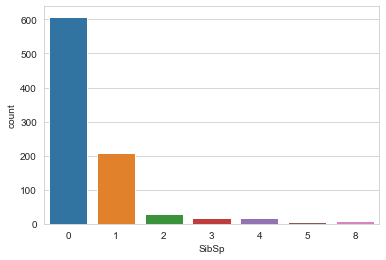

In [11]:
# Siblining & Spouses: most people onboard didn't have sibling or spouse
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

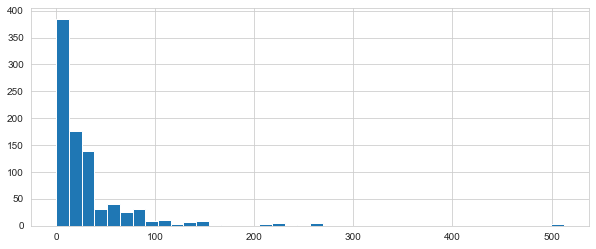

In [12]:
# Fare distribution: we have a concentration of lower fare values as most people were in 3rd class.
train['Fare'].hist(bins=40, figsize=(10,4))

In [13]:
# Interactive plot
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=30)

### Cleaning data & missing imputation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

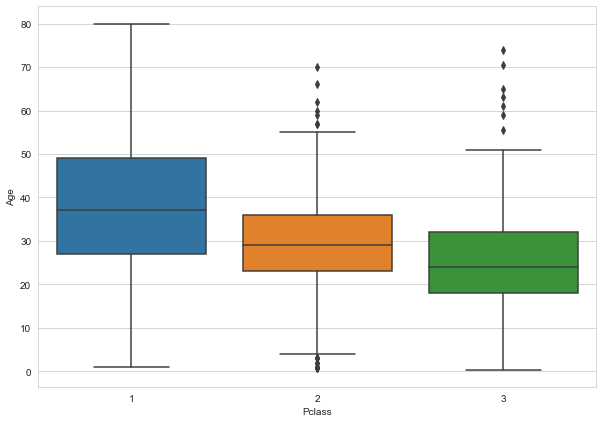

In [14]:
# Average age by passenger class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [15]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [17]:
# Age imputation using apply
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

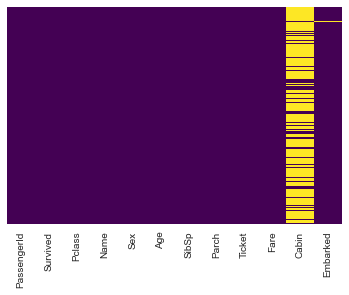

In [18]:
# Check Age has no missings anymore
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

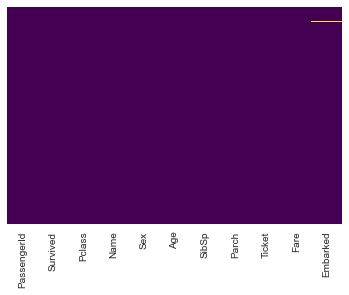

In [19]:
# Drop Cabin variable: too much missings
train.drop('Cabin', axis=1, inplace=True)

# Check Cabin is not present in the data anymore
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

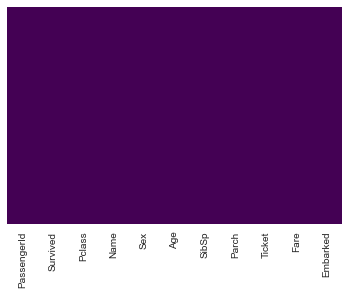

In [20]:
# Remove the row where Embarked is missing
train.dropna(inplace=True)

# Check Cabin is not present in the data anymore
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Feature engineering: Dummy variables for categorical features

ML algorithm can't take categorical features as inputs, they need to be converted to dummy variable format.

In [21]:
# Issue: keeping both variables creates multicollinearity. One variable can predict the other.
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [22]:
# Solve: keep only one of the tables
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
# The same for embarked
pd.get_dummies(train['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [24]:
# Drop first to avoid multicollinearity
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
# Join new information into the table
train = pd.concat([train, sex,embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [26]:
# Remove categorical variables
train.drop(['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Train a model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
# Train / Test split
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
# Train a logist regressions
logmodel = LogisticRegression(max_iter=142)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=142)

In [30]:
# Predict values in test data
predictions = logmodel.predict(X_test)

In [31]:
# Evaluate model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [32]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)